In [8]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

In [16]:
def node_1(state: State):
    return state

def node_2(state: State):
    return state

def node_3(state: State):
    return state

def node_4(state: State):
    return state

def condenser_data(state: State):
    return state


In [17]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("condenser_data", condenser_data)

builder.add_edge(START, 'node_1')
builder.add_edge('node_1', 'node_2')
builder.add_edge('node_1', 'node_3')
builder.add_edge('node_1', 'node_4')
builder.add_edge('node_2', 'condenser_data')
builder.add_edge('node_3', 'condenser_data')
builder.add_edge('node_4', 'condenser_data')
builder.add_edge('condenser_data', END)

agent = builder.compile()


In [18]:
print(agent.get_graph().draw_ascii())

                  +-----------+                    
                  | __start__ |                    
                  +-----------+                    
                         *                         
                         *                         
                         *                         
                    +--------+                     
                    | node_1 |                     
                 ***+--------+****                 
              ***        *        ***              
          ****           *           ****          
        **               *               **        
+--------+          +--------+          +--------+ 
| node_2 |          | node_3 |          | node_4 | 
+--------+****      +--------+       ***+--------+ 
              ***        *        ***              
                 ****    *    ****                 
                     **  *  **                     
                +----------------+                 
            

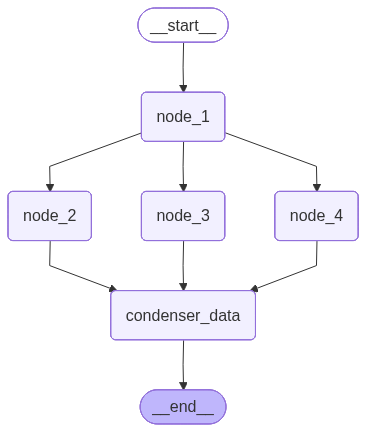

In [19]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))


In [20]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("condenser_data", condenser_data)

builder.add_edge(START, 'node_1')
builder.add_edge(START, 'node_2')
builder.add_edge(START, 'node_3')
builder.add_edge('node_1', 'condenser_data')
builder.add_edge('node_2', 'condenser_data')
builder.add_edge('node_3', 'condenser_data')
builder.add_edge('condenser_data', END)

agent = builder.compile()

                  +-----------+                    
                  | __start__ |                    
                 *+-----------+***                 
              ***        *        ***              
          ****           *           ****          
        **               *               **        
+--------+          +--------+          +--------+ 
| node_1 |          | node_2 |          | node_3 | 
+--------+****      +--------+       ***+--------+ 
              ***        *        ***              
                 ****    *    ****                 
                     **  *  **                     
                +----------------+                 
                | condenser_data |                 
                +----------------+                 
                         *                         
                         *                         
                         *                         
                    +---------+                    
            

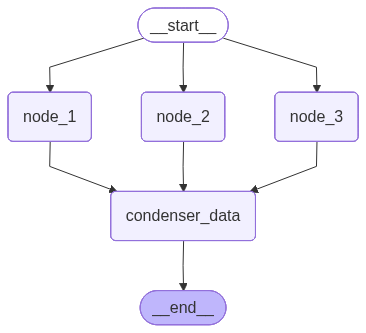

In [22]:
print(agent.get_graph().draw_ascii())
display(Image(agent.get_graph().draw_mermaid_png()))
